# Project 1: Tensorflow

# Part (a)

## Importing necessary libraries

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

## Data

In [10]:
digits = datasets.load_digits()
seed = 1
tf.random.set_seed(seed)
X = digits.data
y = np.array(digits.target, dtype = int)
X,y = shuffle(X,y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=360, random_state=seed, stratify=y)

## Model

In [11]:
Xtrain_img = (Xtrain.reshape(-1, 8, 8, 1)) / 16.0
print(Xtrain_img[0])
Xtest_img  = (Xtest.reshape(-1, 8, 8, 1)) / 16.0

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8, 8, 1)),
    tf.keras.layers.Conv2D(16, kernel_size=3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

[[[0.    ]
  [0.    ]
  [0.    ]
  [0.375 ]
  [0.8125]
  [0.4375]
  [0.    ]
  [0.    ]]

 [[0.    ]
  [0.    ]
  [0.625 ]
  [0.8125]
  [0.375 ]
  [0.9375]
  [0.    ]
  [0.    ]]

 [[0.    ]
  [0.    ]
  [0.75  ]
  [0.5   ]
  [0.25  ]
  [0.75  ]
  [0.    ]
  [0.    ]]

 [[0.    ]
  [0.    ]
  [0.    ]
  [0.0625]
  [0.9375]
  [0.1875]
  [0.    ]
  [0.    ]]

 [[0.    ]
  [0.    ]
  [0.    ]
  [0.625 ]
  [0.9375]
  [0.125 ]
  [0.    ]
  [0.    ]]

 [[0.    ]
  [0.    ]
  [0.    ]
  [0.0625]
  [0.3125]
  [0.9375]
  [0.125 ]
  [0.    ]]

 [[0.    ]
  [0.    ]
  [0.875 ]
  [0.625 ]
  [0.125 ]
  [0.3125]
  [0.6875]
  [0.    ]]

 [[0.    ]
  [0.    ]
  [0.125 ]
  [0.4375]
  [0.8125]
  [0.9375]
  [0.5   ]
  [0.    ]]]


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 8, 8, 16)       │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_33 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,714 (34.04 KB)

 Trainable params: 8,714 (34.04 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [ ]:
history = model.fit(
    Xtrain_img, ytrain,
    validation_split=0.15,
    epochs=15,
    batch_size=32,
    verbose=1
)

Epoch 1/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2679 - loss: 2.2644 - val_accuracy: 0.4352 - val_loss: 2.1245
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4964 - loss: 2.0296 - val_accuracy: 0.6343 - val_loss: 1.7617
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 1.5958 - val_accuracy: 0.8009 - val_loss: 1.1744
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 1.0492 - val_accuracy: 0.8657 - val_loss: 0.7126
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8668 - loss: 0.6816 - val_accuracy: 0.8935 - val_loss: 0.4913
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8916 - loss: 0.4912 - val_accuracy: 0.9120 - val_loss: 0.3786
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9066 - loss: 0.3815 - val_accuracy: 0.9167 - val_loss: 0.3121
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9192 - loss: 0.3109 - val_accuracy: 0.9306 - val_loss:

## Evaluation

Test accuracy: 0.981


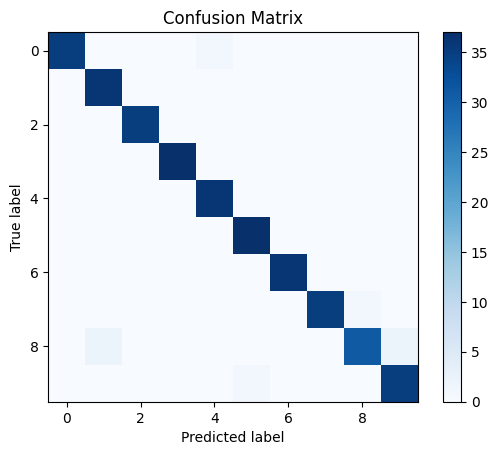

In [ ]:
test_loss, test_acc = model.evaluate(Xtest_img, ytest, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

yprob = model.predict(Xtest_img, verbose=0)
ypred = np.argmax(yprob, axis=1)

cm = confusion_matrix(ytest, ypred)
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Part (b)

## Size of training data test

In [14]:
def make_model(filters=16, dense_units=32):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(8, 8, 1)),
        tf.keras.layers.Conv2D(filters, kernel_size=3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(dense_units, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [15]:
fractions = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
results_size = []

for f in [round(x, 2) for x in np.arange(0.05, 1.05, 0.05)]:
    if f < 1.0:
        Xsub, _, ysub, _ = train_test_split(Xtrain_img, ytrain, train_size=f, random_state=1, stratify=ytrain)
    else:
        Xsub, ysub = Xtrain_img, ytrain
    model = make_model(filters=16, dense_units=32)
    model.fit(Xsub, ysub, validation_split=0.15, epochs=15, batch_size=32,verbose=0)
    test_loss, test_acc = model.evaluate(Xtest_img, ytest, verbose=0)
    results_size.append((f, len(ysub), test_acc))
    print(f"Train frac={f}, n={len(ysub)}, test acc={test_acc:.3f}")

Train frac=0.05, n=71, test acc=0.319
Train frac=0.1, n=143, test acc=0.583
Train frac=0.15, n=215, test acc=0.822
Train frac=0.2, n=287, test acc=0.864
Train frac=0.25, n=359, test acc=0.894
Train frac=0.3, n=431, test acc=0.886
Train frac=0.35, n=502, test acc=0.894
Train frac=0.4, n=574, test acc=0.942
Train frac=0.45, n=646, test acc=0.933
Train frac=0.5, n=718, test acc=0.944
Train frac=0.55, n=790, test acc=0.953
Train frac=0.6, n=862, test acc=0.950
Train frac=0.65, n=934, test acc=0.936
Train frac=0.7, n=1005, test acc=0.947
Train frac=0.75, n=1077, test acc=0.964
Train frac=0.8, n=1149, test acc=0.956
Train frac=0.85, n=1221, test acc=0.958
Train frac=0.9, n=1293, test acc=0.958
Train frac=0.95, n=1365, test acc=0.969
Train frac=1.0, n=1437, test acc=0.969


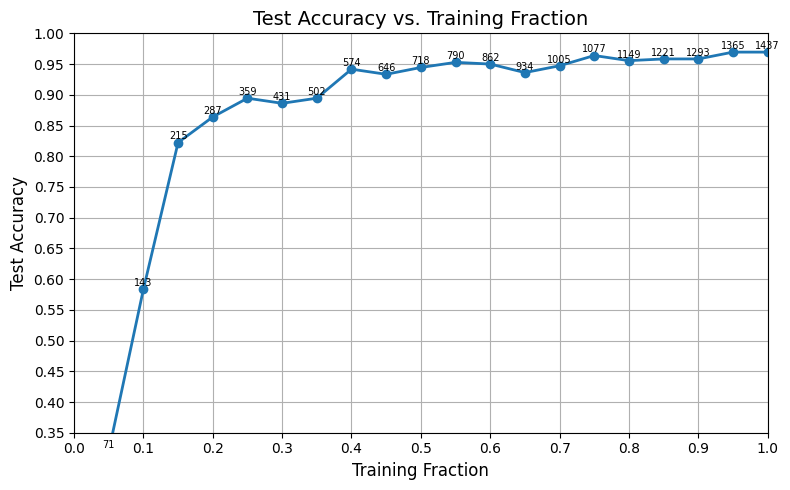

In [ ]:
fractions = np.array([row[0] for row in results_size])
n_samples = np.array([row[1] for row in results_size])
test_acc = np.array([row[2] for row in results_size])

plt.figure(figsize=(8, 5))
plt.plot(fractions, test_acc, marker='o', linewidth=2)

for f, acc, n in zip(fractions, test_acc, n_samples):
    plt.text(f, acc + 0.005, str(n), ha='center', fontsize=7)

plt.title("Test Accuracy vs. Training Fraction", fontsize=14)
plt.xlabel("Training Fraction", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)

yticks = np.arange(0.35, 1.001, 0.05)
plt.yticks(yticks, [f"{y:.2f}" for y in yticks])

xticks = np.arange(0.0, 1.01, 0.1)
plt.xticks(xticks, [f"{x:.1f}" for x in xticks])

plt.xlim(0.0, 1.0)
plt.ylim(0.35, 1.00)

plt.grid(True)
plt.tight_layout()
plt.show()

## Number of parameters test

In [17]:
n_parameter_models = {}

for param in range(1, 17):
    model = make_model(param, 2*param)
    n_parameter_models[f"model_{param}"] = model

results_arch = []

for name, m in n_parameter_models.items():
    print(f"\nTraining {name}")
    print("Parameters:", m.count_params())
    history = m.fit(
        Xtrain_img, ytrain,
        validation_split=0.15,
        epochs=15,
        batch_size=32,
        verbose=0
    )
    test_loss, test_acc = m.evaluate(Xtest_img, ytest, verbose=0)
    results_arch.append((name, m.count_params(), test_acc))
    print(f"{name}: params={m.count_params()}, test acc={test_acc:.3f}")

model_names = [row[0] for row in results_arch]
n_params     = np.array([row[1] for row in results_arch])
test_acc     = np.array([row[2] for row in results_arch])



Training model_1
Parameters: 74
model_1: params=74, test acc=0.233

Training model_2
Parameters: 202
model_2: params=202, test acc=0.503

Training model_3
Parameters: 394
model_3: params=394, test acc=0.828

Training model_4
Parameters: 650
model_4: params=650, test acc=0.836

Training model_5
Parameters: 970
model_5: params=970, test acc=0.883

Training model_6
Parameters: 1354
model_6: params=1354, test acc=0.906

Training model_7
Parameters: 1802
model_7: params=1802, test acc=0.919

Training model_8
Parameters: 2314
model_8: params=2314, test acc=0.956

Training model_9
Parameters: 2890
model_9: params=2890, test acc=0.953

Training model_10
Parameters: 3530
model_10: params=3530, test acc=0.969

Training model_11
Parameters: 4234
model_11: params=4234, test acc=0.958

Training model_12
Parameters: 5002
model_12: params=5002, test acc=0.969

Training model_13
Parameters: 5834
model_13: params=5834, test acc=0.975

Training model_14
Parameters: 6730
model_14: params=6730, test acc=

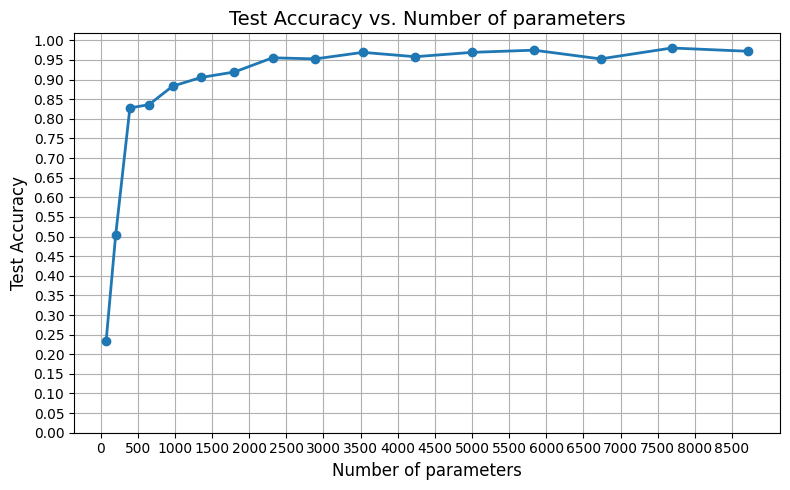

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(n_params, test_acc, marker='o', linewidth=2)

plt.title("Test Accuracy vs. Number of parameters", fontsize=14)
plt.xlabel("Number of parameters", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)

yticks = np.arange(0, 1.001, 0.05)
plt.yticks(yticks, [f"{y:.2f}" for y in yticks])

xticks = np.arange(0, 8700, 500)
plt.xticks(xticks)

plt.grid(True)
plt.tight_layout()
plt.show()